# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter

## Getting the Data

In [3]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [4]:
Currency_Pair = 'USDCHF'

## TF D1

In [5]:
TF = 'D1'

In [6]:
data_1 = XAUUSD[TF]

In [7]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

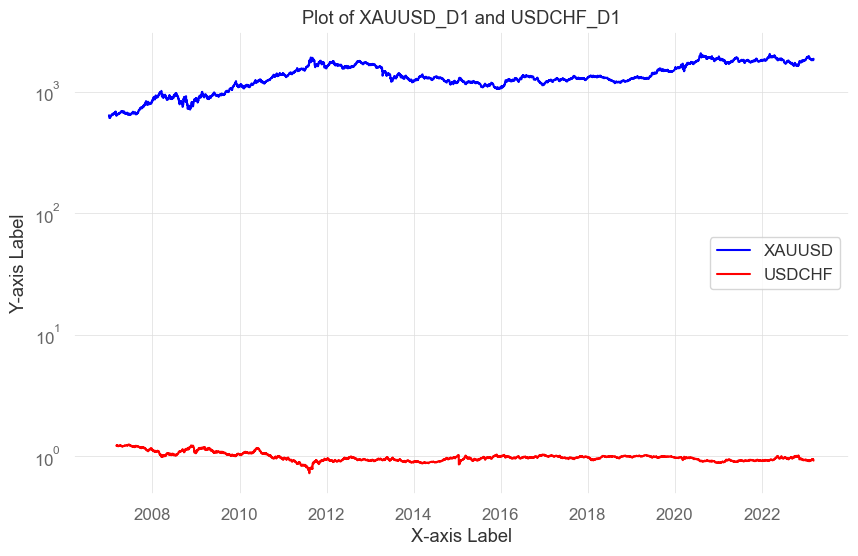

In [8]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [9]:
KF = Kalman_Filter(data_1, data_2)

In [10]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          5.023e+04
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:46:46   Log-Likelihood:                         -37360.
No. Observations:                5011   AIC:                                  7.472e+04
Df Residuals:                    5010   BIC:                                  7.473e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1343.0860      5.993    224.111      0.000    1331.337    1354.835
==============================================================================
Omnibus:                      157.503   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.950
Skew:                          -0.416   Prob(JB):                     6.81e-36
Kurtosis:                       2.711   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -81.59%
CAGR﹪                     -7.03%

Sharpe                     -0.29
Prob. Sharpe Ratio         9.43%
Smart Sharpe               -0.29
Sortino                    -0.39
Smart Sortino              -0.39
Sortino/√2                 -0.28
Smart Sortino/√2           -0.27
Omega                      0.95

Max Drawdown               -87.08%
Longest DD Days            5750
Volatility (ann.)          21.28%
Calmar                     -0.08
Skew                       -0.92
Kurtosis                   12.96

Expected Daily %           -0.03%
Expected Monthly %         -0.87%
Expected Yearly %          -9.48%
Kelly Criterion            -2.79%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.23%
Expected Shortfall (cVaR)  -2.23%

Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-13,2018-04-16,2023-03-10,5750,-87.075507,-86.548871
2,2007-03-11,2007-04-22,2007-06-11,93,-8.405297,-8.390901
3,2007-03-07,2007-03-07,2007-03-08,2,-0.641880,-0.390085


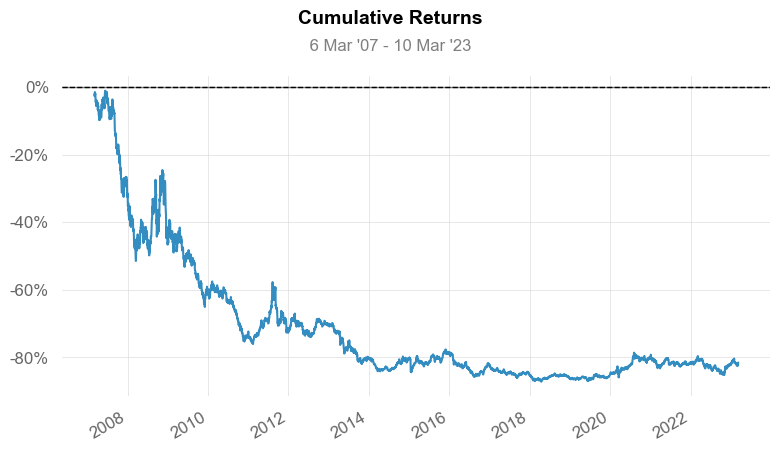

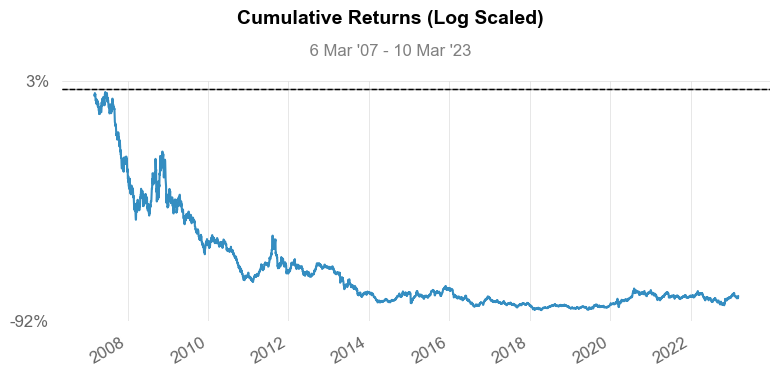

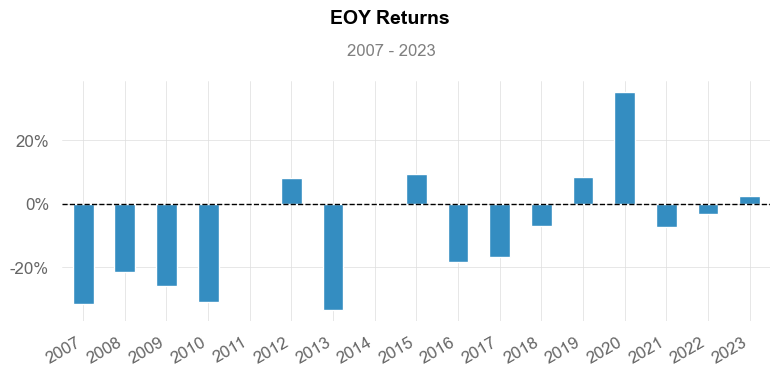

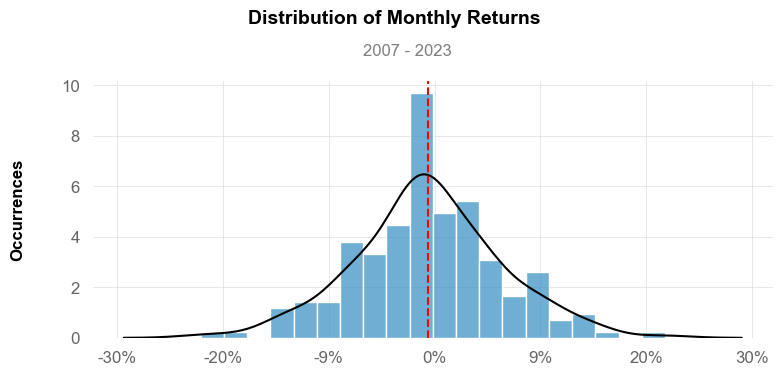

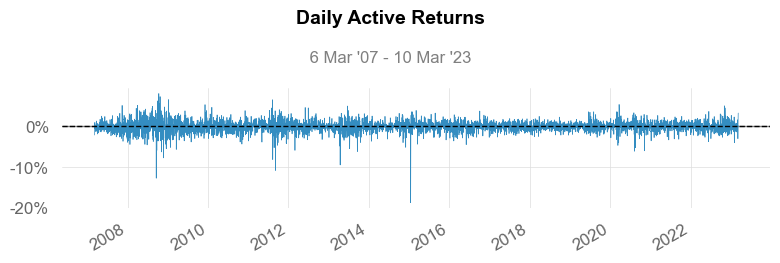

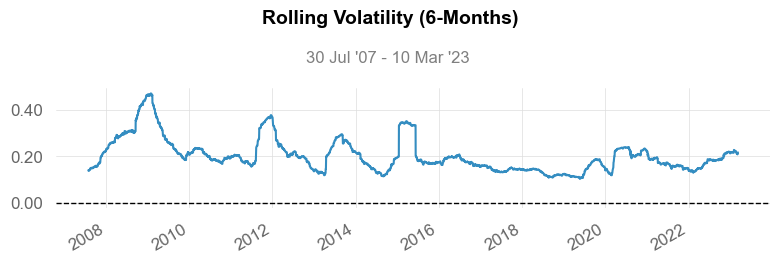

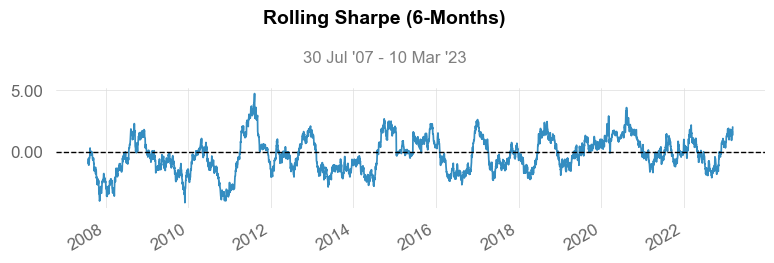

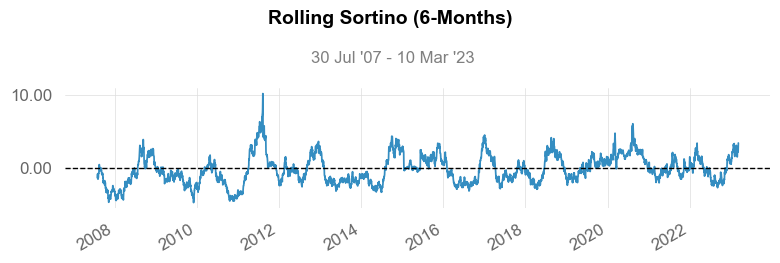

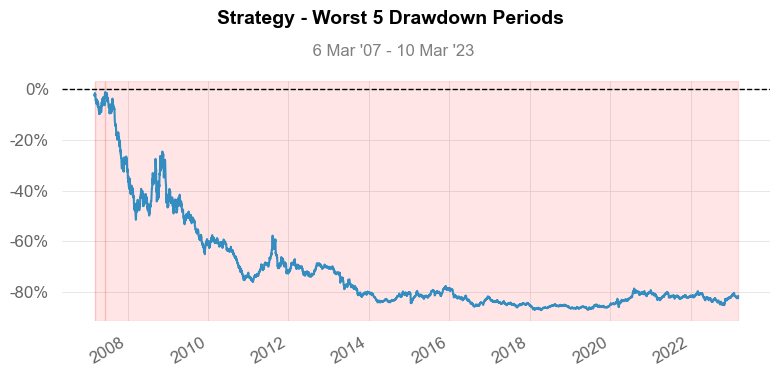

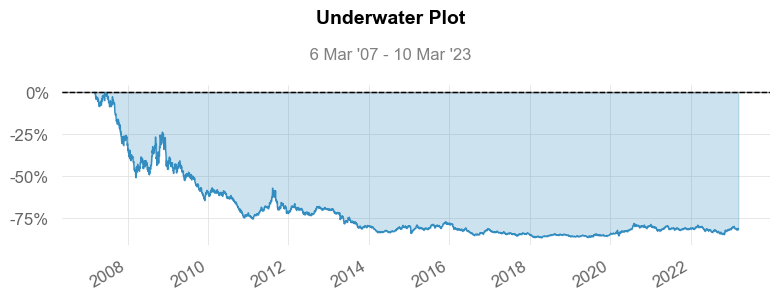

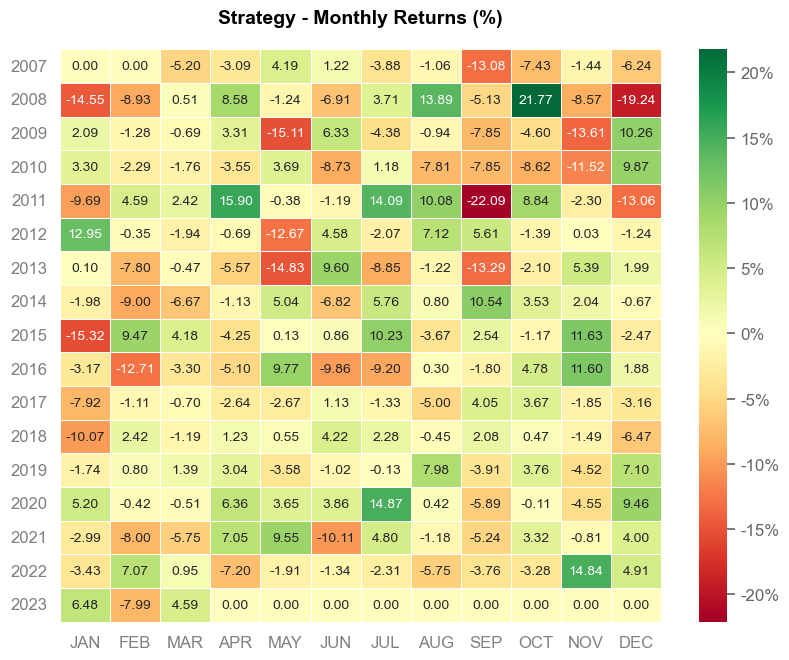

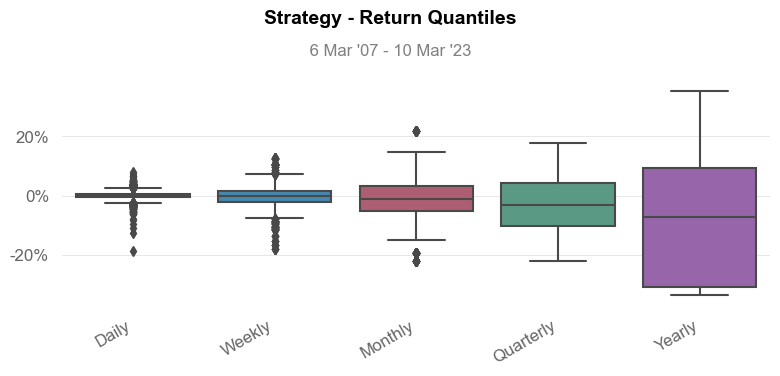

In [12]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H4

In [13]:
TF = 'H4'

In [14]:
data_1 = XAUUSD[TF]

In [15]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

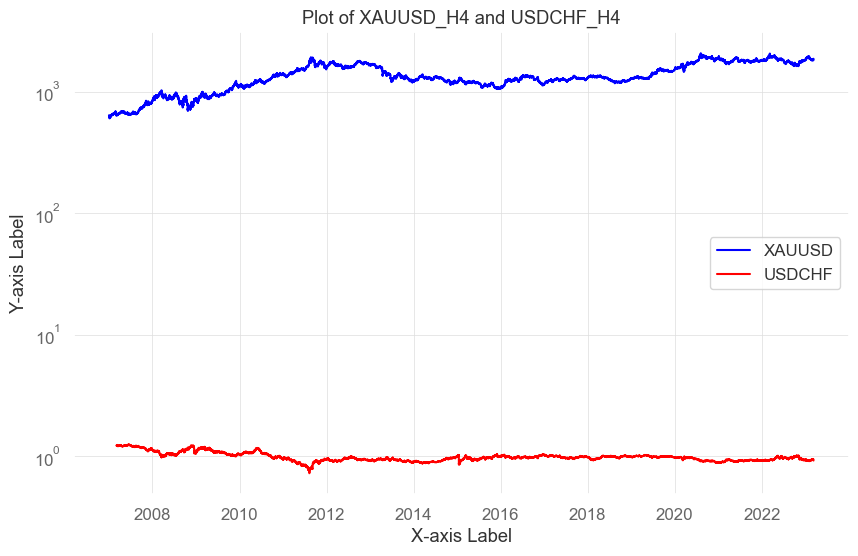

In [16]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [17]:
KF = Kalman_Filter(data_1, data_2)

In [18]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          2.587e+05
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:48:19   Log-Likelihood:                     -1.9272e+05
No. Observations:               25846   AIC:                                  3.854e+05
Df Residuals:                   25845   BIC:                                  3.854e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1342.5244      2.640    508.594      0.000    1337.351    1347.698
==============================================================================
Omnibus:                      817.100   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              839.683
Skew:                          -0.417   Prob(JB):                    4.63e-183
Kurtosis:                       2.709   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -33.98%
CAGR﹪                     -1.77%

Sharpe                     -0.4
Prob. Sharpe Ratio         3.81%
Smart Sharpe               -0.38
Sortino                    -0.54
Smart Sortino              -0.52
Sortino/√2                 -0.38
Smart Sortino/√2           -0.37
Omega                      0.92

Max Drawdown               -53.01%
Longest DD Days            5842
Volatility (ann.)          4.97%
Calmar                     -0.03
Skew                       -0.63
Kurtosis                   20.8

Expected Daily %           -0.01%
Expected Monthly %         -0.21%
Expected Yearly %          -2.41%
Kelly Criterion            -4.1%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.52%
Expected Shortfall (cVaR)  -0.52%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-03-13,2019-06-02,2023-03-10,5842,-53.010297,-52.084870
2,2007-03-06,2007-03-06,2007-03-06,1,-0.282251,NaN
3,2007-03-08,2007-03-11,2007-03-11,4,-0.228071,-0.110577


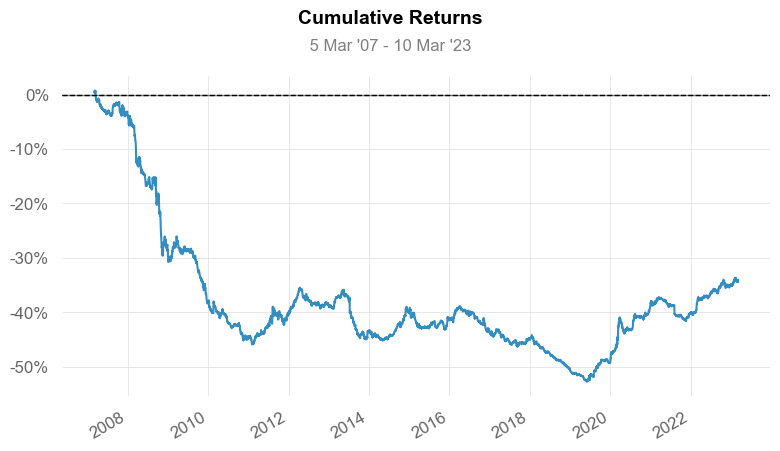

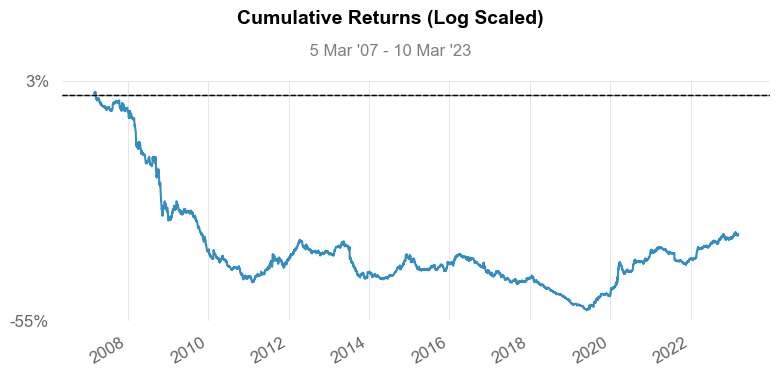

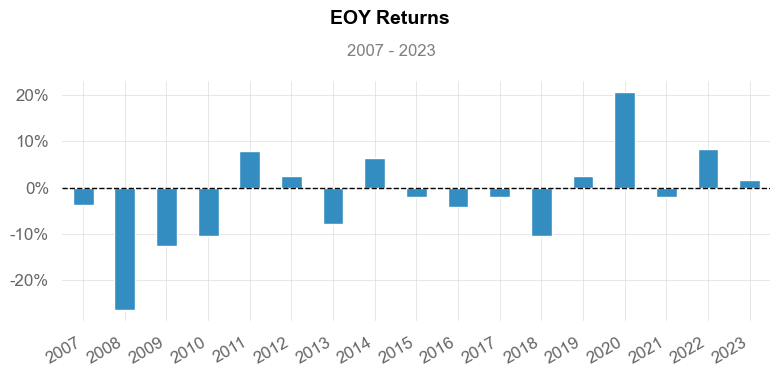

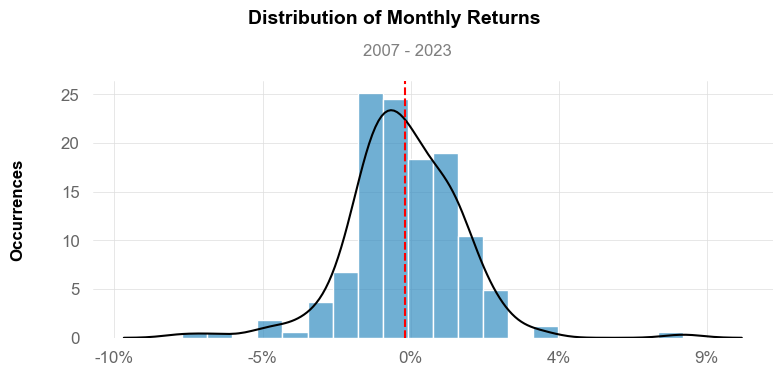

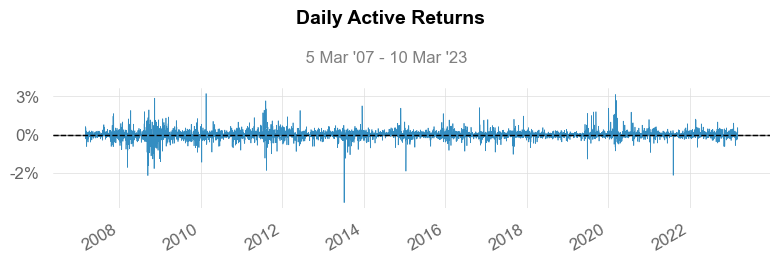

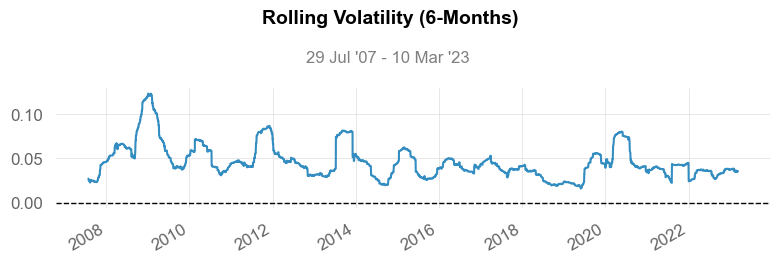

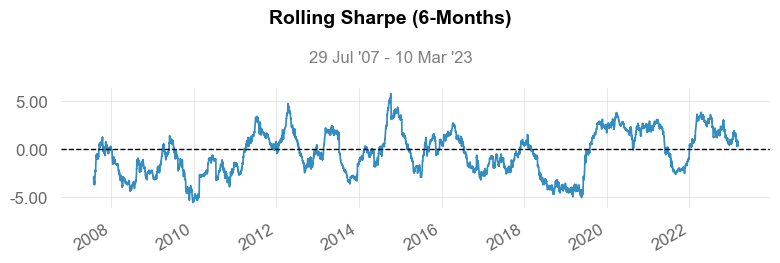

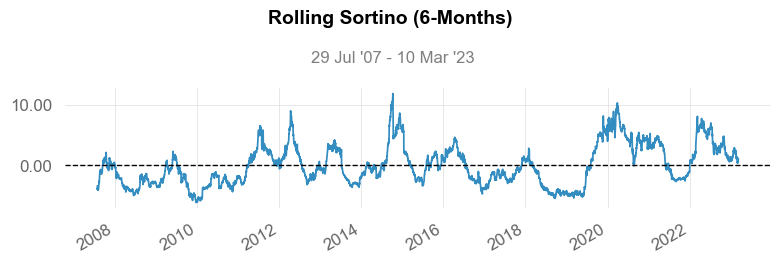

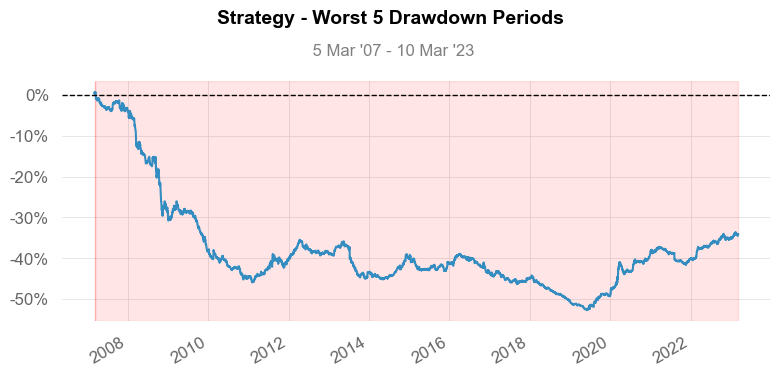

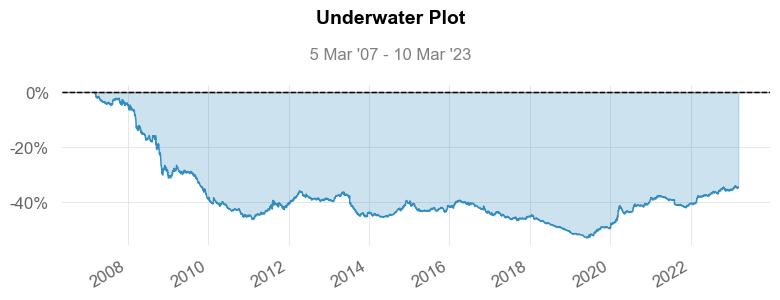

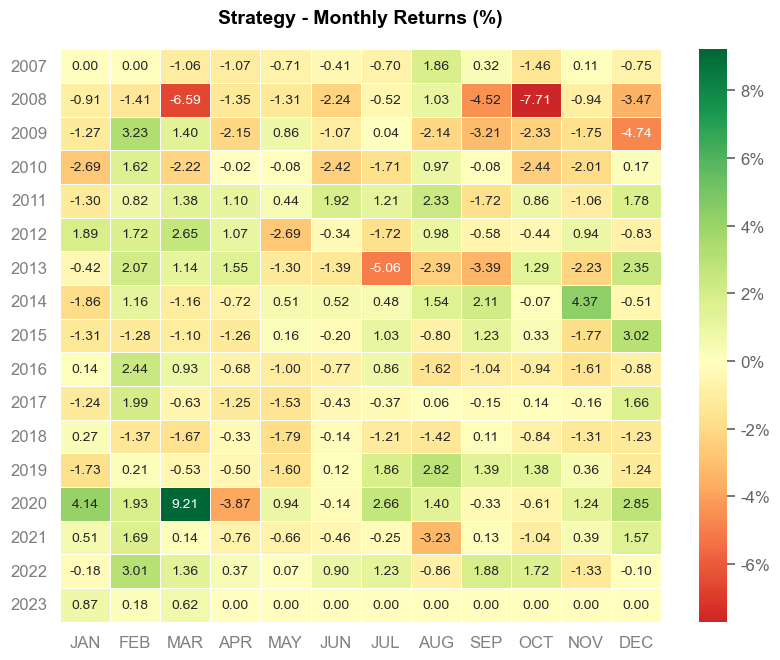

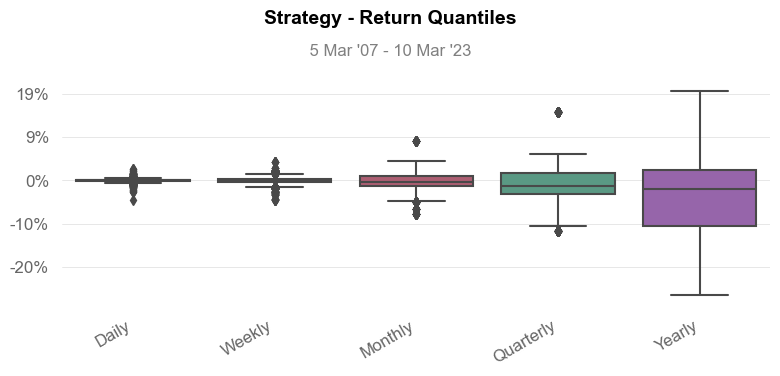

In [20]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H1

In [21]:
TF = 'H1'

In [22]:
data_1 = XAUUSD[TF]

In [23]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

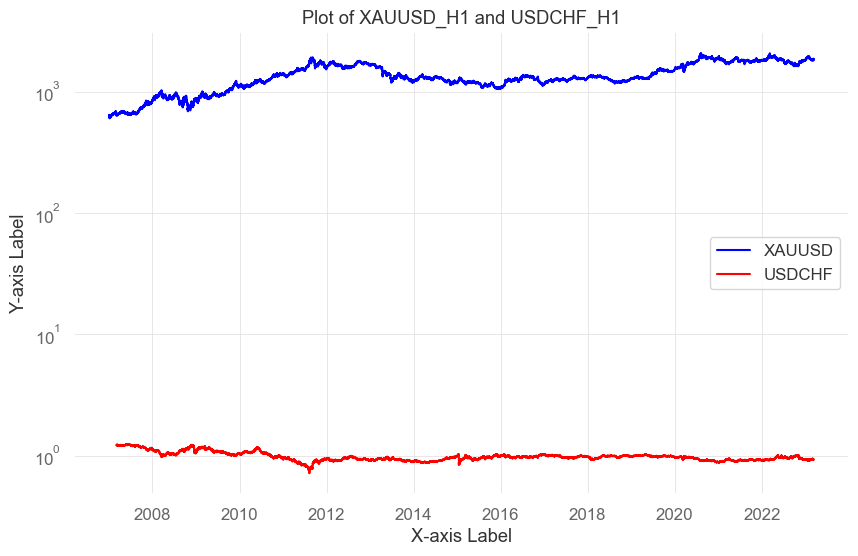

In [24]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [25]:
KF = Kalman_Filter(data_1, data_2)

In [26]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          1.001e+06
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:51:49   Log-Likelihood:                     -7.4573e+05
No. Observations:              100012   AIC:                                  1.491e+06
Df Residuals:                  100011   BIC:                                  1.491e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1342.4023      1.342   1000.254      0.000    1339.772    1345.033
==============================================================================
Omnibus:                     3165.145   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3251.227
Skew:                          -0.417   Prob(JB):                         0.00
Kurtosis:                       2.709   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -13.44%
CAGR﹪                     -0.62%

Sharpe                     -0.22
Prob. Sharpe Ratio         16.66%
Smart Sharpe               -0.21
Sortino                    -0.3
Smart Sortino              -0.3
Sortino/√2                 -0.22
Smart Sortino/√2           -0.21
Omega                      0.96

Max Drawdown               -37.77%
Longest DD Days            5594
Volatility (ann.)          3.12%
Calmar                     -0.02
Skew                       -0.09
Kurtosis                   16.07

Expected Daily %           -0.0%
Expected Monthly %         -0.07%
Expected Yearly %          -0.85%
Kelly Criterion            -2.12%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.33%
Expected Shortfall (cVaR)  -0.33%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-11-16,2019-03-07,2023-03-10,5594,-37.769704,-37.478538
2,2007-03-13,2007-06-26,2007-08-17,158,-2.300442,-2.237738
3,2007-09-19,2007-10-21,2007-11-06,49,-0.731067,-0.661358
4,2007-11-08,2007-11-09,2007-11-11,4,-0.449380,-0.301752
5,2007-08-21,2007-08-31,2007-09-05,16,-0.339530,-0.316958


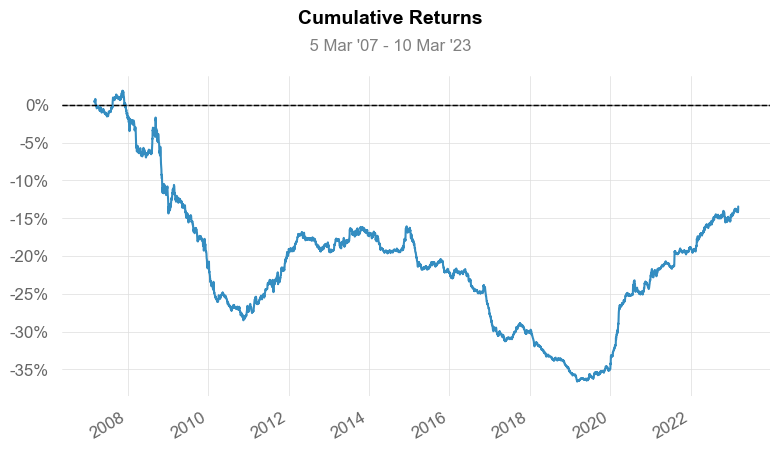

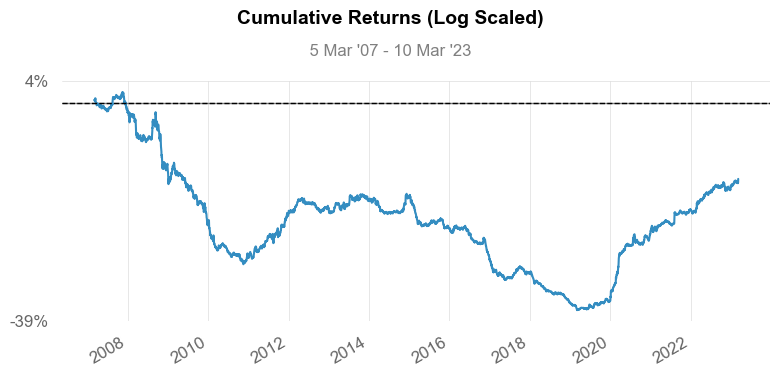

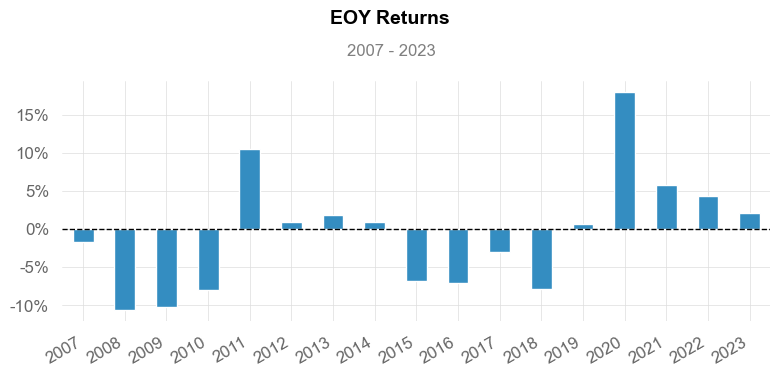

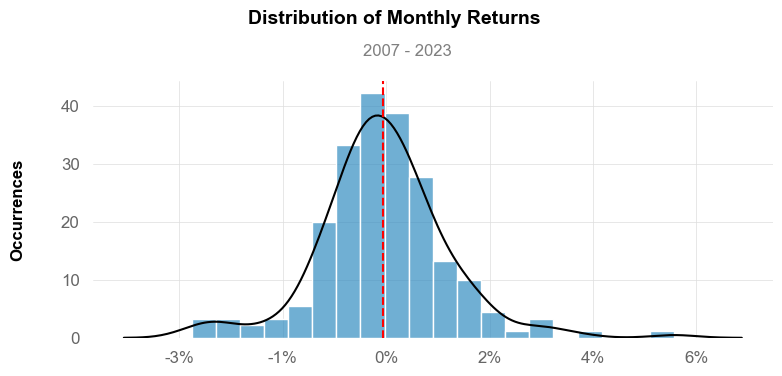

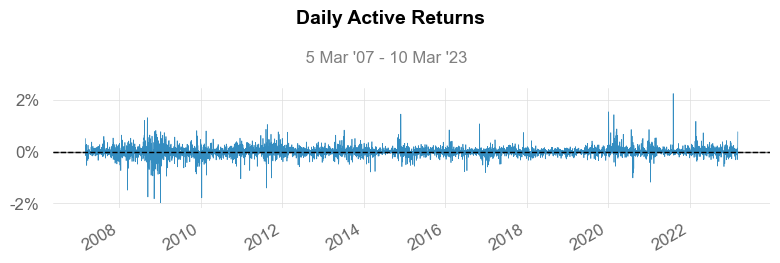

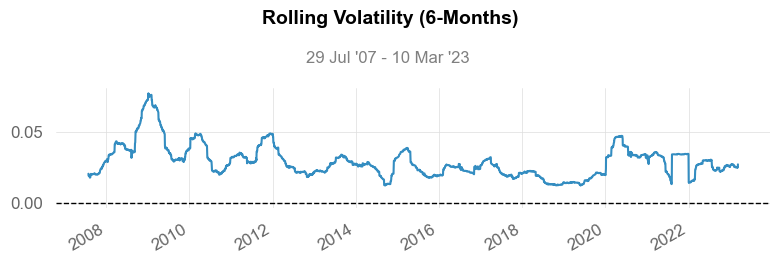

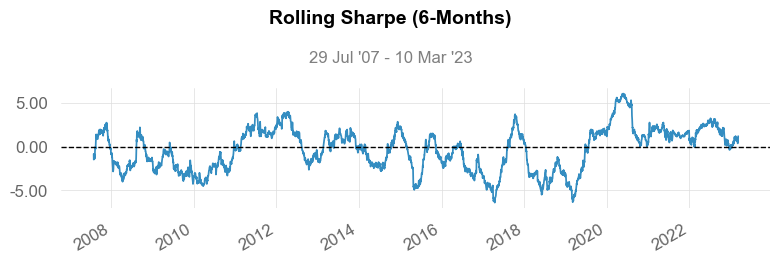

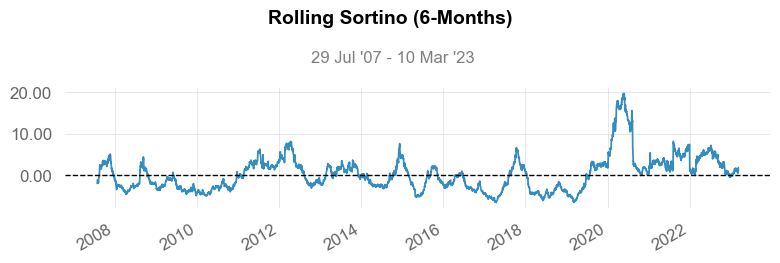

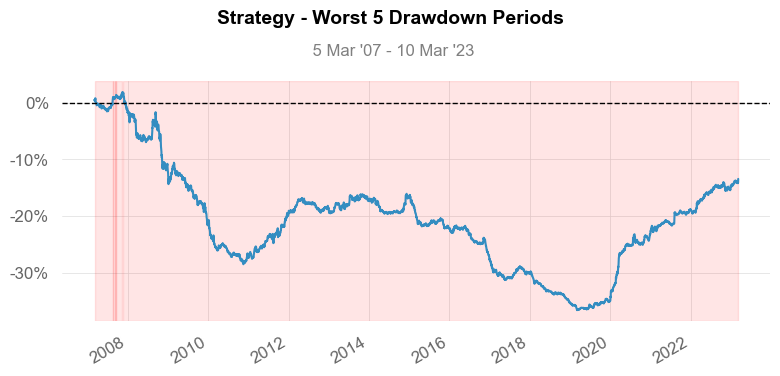

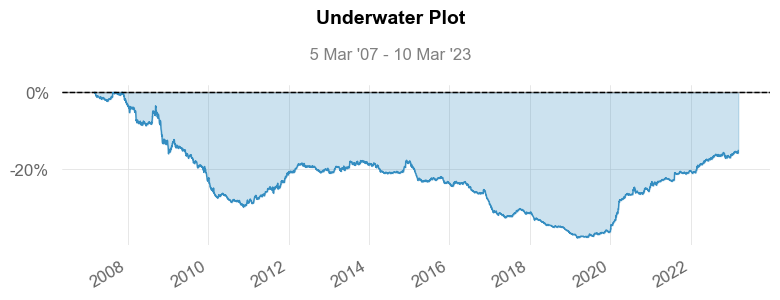

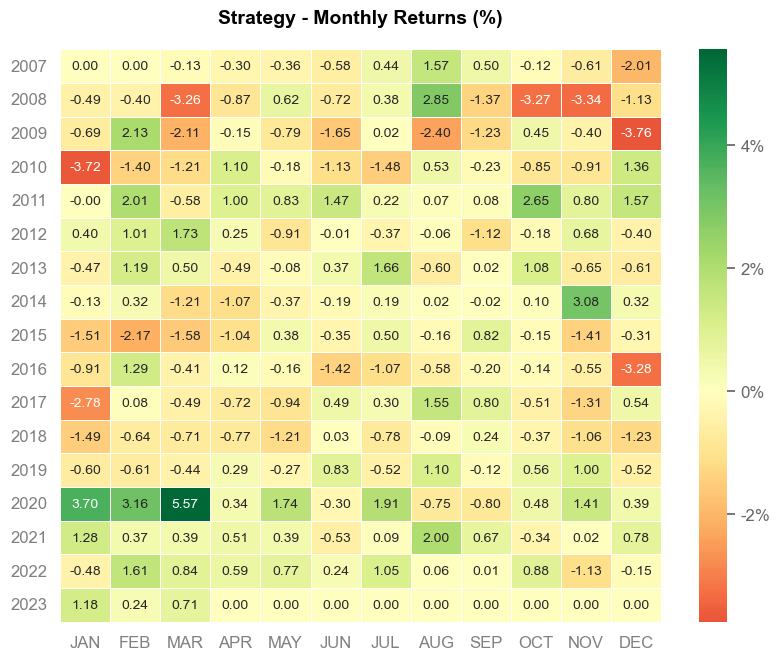

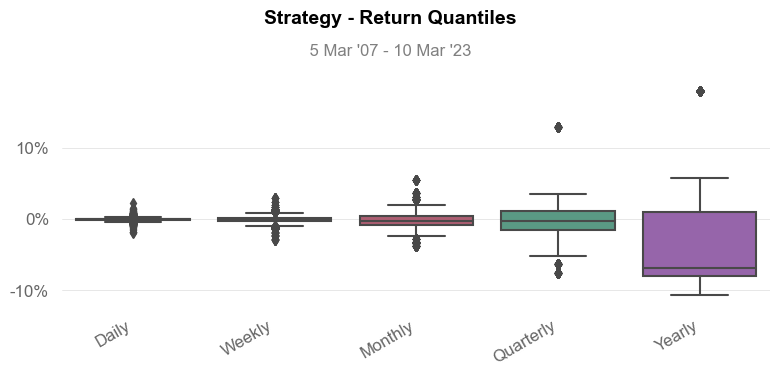

In [28]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H30

In [31]:
TF = 'M30'

In [32]:
data_1 = XAUUSD[TF]

In [33]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

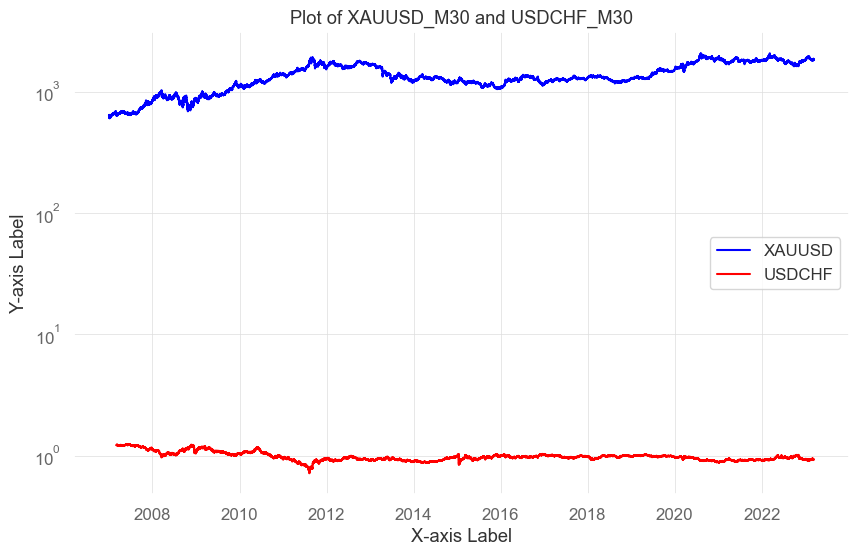

In [34]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [35]:
KF = Kalman_Filter(data_1, data_2)

In [36]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          2.001e+06
Date:                Mon, 12 Feb 2024   Prob (F-statistic):                        0.00
Time:                        00:14:05   Log-Likelihood:                     -1.4913e+06
No. Observations:              200000   AIC:                                  2.983e+06
Df Residuals:                  199999   BIC:                                  2.983e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1342.3810      0.949   1414.478      0.000    1340.521    1344.241
==============================================================================
Omnibus:                     6328.564   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6500.138
Skew:                          -0.417   Prob(JB):                         0.00
Kurtosis:                       2.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          15.92%
CAGR﹪                     0.64%

Sharpe                     0.37
Prob. Sharpe Ratio         94.84%
Smart Sharpe               0.37
Sortino                    0.52
Smart Sortino              0.52
Sortino/√2                 0.37
Smart Sortino/√2           0.37
Omega                      1.07

Max Drawdown               -9.41%
Longest DD Days            2223
Volatility (ann.)          2.08%
Calmar                     0.07
Skew                       -0.43
Kurtosis                   10.78

Expected Daily %           0.0%
Expected Monthly %         0.08%
Expected Yearly %          0.87%
Kelly Criterion            3.43%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.21%
Expected Shortfall (cVaR)  -0.21%

Max Consecutive Wins       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-10-07,2010-12-07,2014-11-07,2223,-9.414690,-8.976966
2,2014-12-05,2017-05-30,2020-02-11,1895,-3.995609,-3.849665
3,2007-11-21,2008-06-15,2008-09-09,294,-3.975371,-3.894406
4,2008-09-11,2008-09-17,2008-10-05,25,-2.324707,-2.257865
5,2020-08-11,2021-02-02,2021-08-06,361,-2.039356,-1.849756


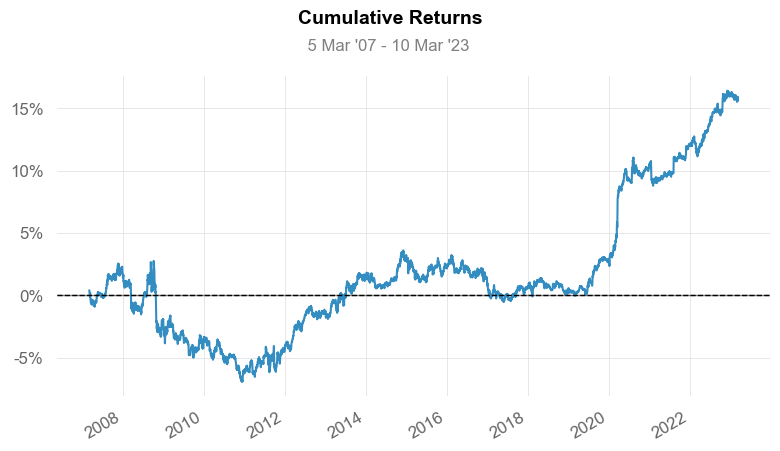

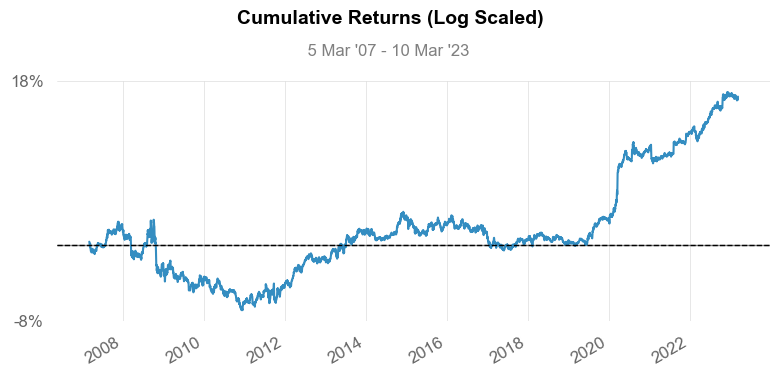

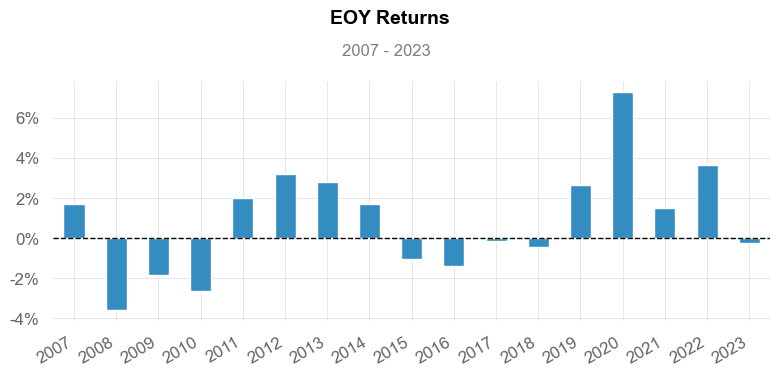

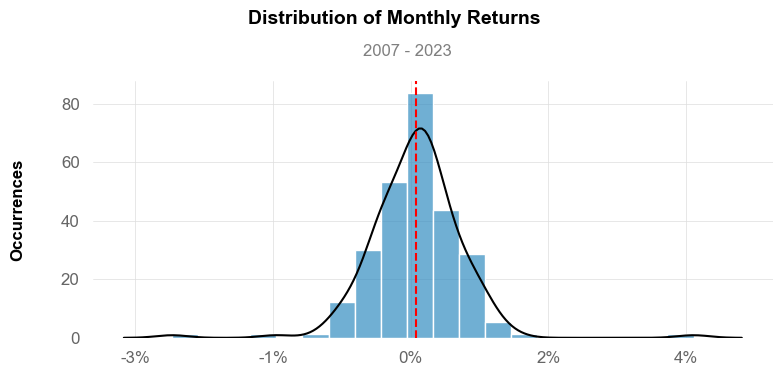

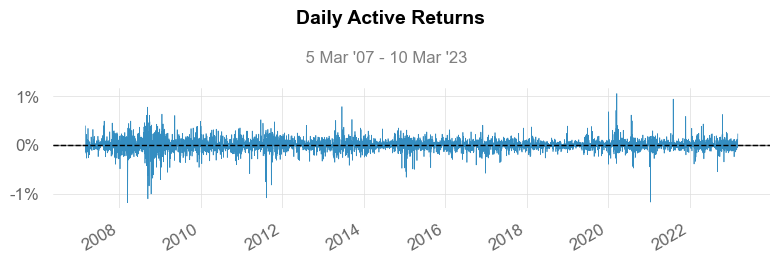

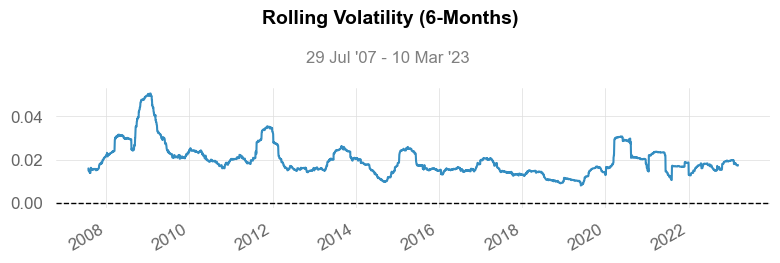

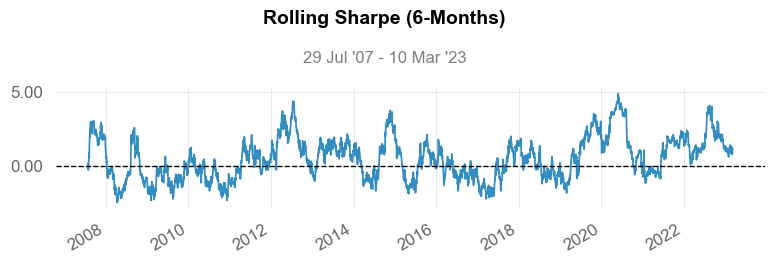

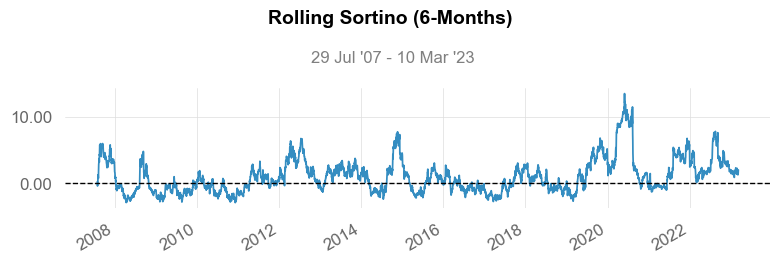

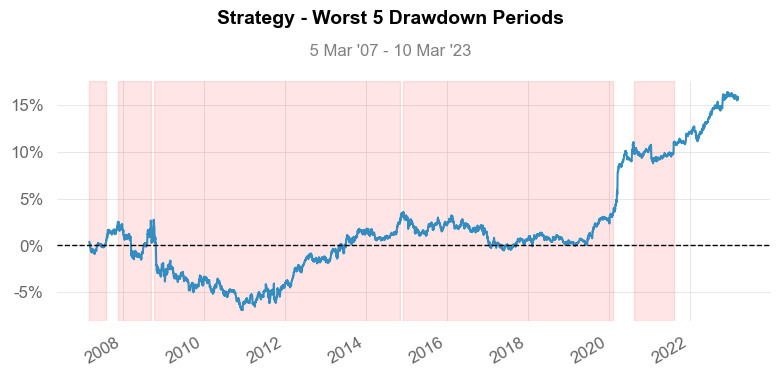

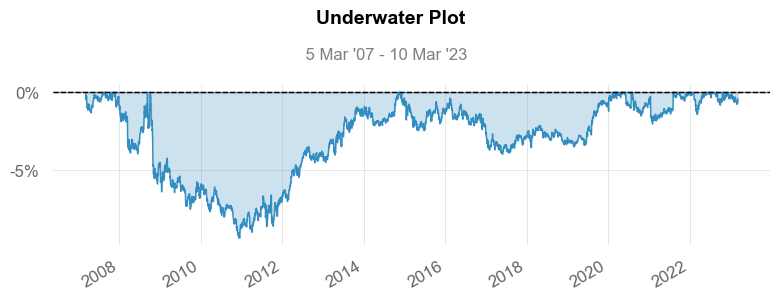

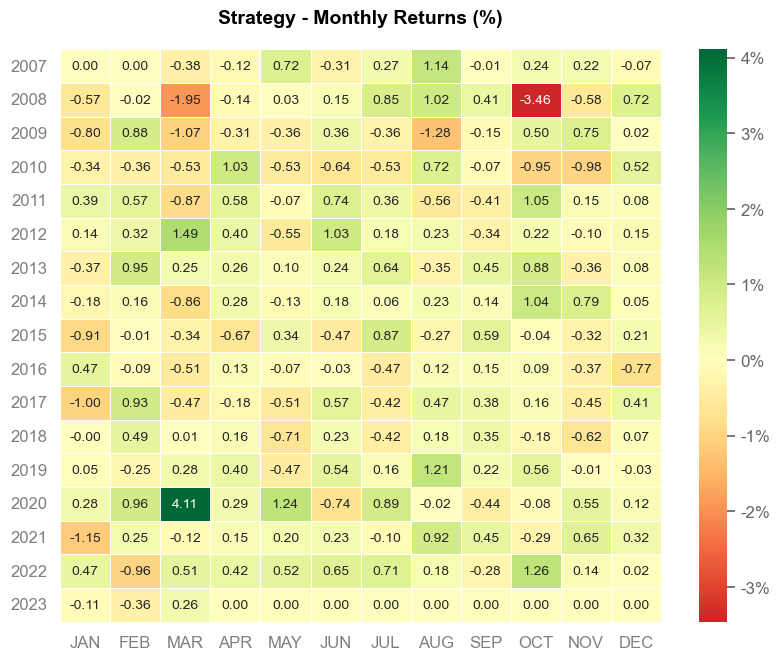

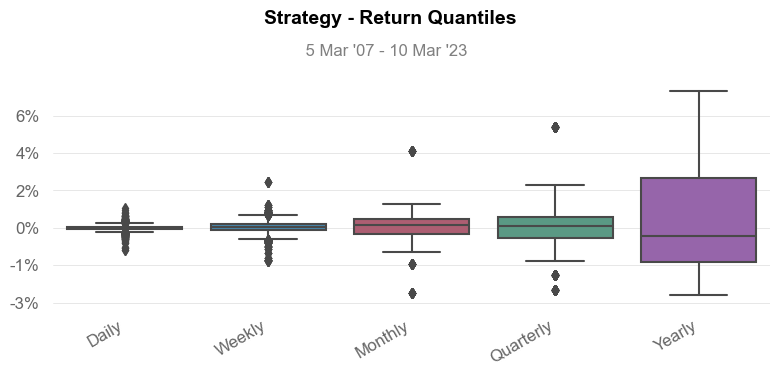

In [38]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())